In [1]:
from datetime import datetime, timedelta
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

In [2]:
df = pd.read_excel('data/muestra.xlsx')
df["FechaID"] = df["FechaID"].astype(str).str.zfill(8)
df["TurnoHoraInicio"] = df["TurnoHoraInicio"].astype(str)
df["FechaHoraLLegada"] = pd.to_datetime(df["FechaID"] + " " + df["TurnoHoraInicio"], format="%Y%m%d %H:%M:%S")
df["FechaHoraLLegada"] = pd.to_datetime(df["FechaHoraLLegada"])
df.head()

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,TAPRecepcionCaja,FechaHoraLLegada
0,316483,COYOACAN,20240301,6,41684208,N015,Solicitar Estudios,06:02:44,06:13:23,NaN,NaN,NaN,2024-03-01 06:02:44
1,316499,COYOACAN,20240301,6,41684414,N025,Solicitar Estudios,06:09:35,06:19:43,10.13,NaN,NaN,2024-03-01 06:09:35
2,316515,COYOACAN,20240301,6,41684824,N038,Solicitar Estudios,06:18:16,06:30:42,12.43,NaN,NaN,2024-03-01 06:18:16
3,316531,COYOACAN,20240301,6,41684679,P004,Triage,06:25:09,06:27:01,1.87,NaN,NaN,2024-03-01 06:25:09
4,316547,COYOACAN,20240301,6,41685173,C011,Citado,06:35:09,06:37:47,2.63,NaN,NaN,2024-03-01 06:35:09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59650 entries, 0 to 59649
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Orden                59650 non-null  int64         
 1   Sucursal             59650 non-null  object        
 2   FechaID              59650 non-null  object        
 3   HoraLLegada          59650 non-null  int64         
 4   TurnoID              59650 non-null  int64         
 5   Turno                59650 non-null  object        
 6   TurnoTipo            59650 non-null  object        
 7   TurnoHoraInicio      59650 non-null  object        
 8   TurnoHoraFin         59650 non-null  object        
 9   TurnoMinutosEspera   59649 non-null  float64       
 10  TAPRecepcionMinutos  26316 non-null  float64       
 11  TAPRecepcionCaja     26316 non-null  float64       
 12  FechaHoraLLegada     59650 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3

In [4]:
df.Sucursal.unique()

array(['COYOACAN', 'CULIACAN', 'CULIACAN CAÑADAS',
       'CULIACAN COLEGIO MILITAR', 'CULIACAN LA CONQUISTA'], dtype=object)

In [5]:
df.drop('TAPRecepcionCaja', axis = 1, inplace = True)

In [6]:
df['TurnoMinutosEspera'] = df.groupby('Sucursal')['TurnoMinutosEspera'].transform(lambda x: x.fillna(x.mean()))
df['TAPRecepcionMinutos'] = df['TAPRecepcionMinutos'].transform(lambda x: x.fillna(x.mean()))

In [7]:
cajas_por_sucursal = {'COYOACAN': 10, 'CULIACAN': 7, 'CULIACAN CAÑADAS': 3, 'CULIACAN COLEGIO MILITAR':4, 'CULIACAN LA CONQUISTA':5}

df['Cajas'] = df['Sucursal'].map(cajas_por_sucursal)

In [8]:
df['Prioridad'] = np.random.choice([1, 0], size=len(df), p=[0.6, 0.4])
df.head()

,Orden,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,FechaHoraLLegada,Cajas,Prioridad
0,316483,COYOACAN,20240301,6,41684208,N015,Solicitar Estudios,06:02:44,06:13:23,13.321135,3.518992,2024-03-01 06:02:44,10,1
1,316499,COYOACAN,20240301,6,41684414,N025,Solicitar Estudios,06:09:35,06:19:43,10.130000,3.518992,2024-03-01 06:09:35,10,0
2,316515,COYOACAN,20240301,6,41684824,N038,Solicitar Estudios,06:18:16,06:30:42,12.430000,3.518992,2024-03-01 06:18:16,10,0
3,316531,COYOACAN,20240301,6,41684679,P004,Triage,06:25:09,06:27:01,1.870000,3.518992,2024-03-01 06:25:09,10,1
4,316547,COYOACAN,20240301,6,41685173,C011,Citado,06:35:09,06:37:47,2.630000,3.518992,2024-03-01 06:35:09,10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59650 entries, 0 to 59649
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Orden                59650 non-null  int64         
 1   Sucursal             59650 non-null  object        
 2   FechaID              59650 non-null  object        
 3   HoraLLegada          59650 non-null  int64         
 4   TurnoID              59650 non-null  int64         
 5   Turno                59650 non-null  object        
 6   TurnoTipo            59650 non-null  object        
 7   TurnoHoraInicio      59650 non-null  object        
 8   TurnoHoraFin         59650 non-null  object        
 9   TurnoMinutosEspera   59650 non-null  float64       
 10  TAPRecepcionMinutos  59650 non-null  float64       
 11  FechaHoraLLegada     59650 non-null  datetime64[ns]
 12  Cajas                59650 non-null  int64         
 13  Prioridad            59650 non-

In [10]:
df.to_csv('muestras_clean.csv', index=False)

# SIMULACIÓN DE PACIENTES

In [11]:
def simulacion_pacientes(sucursal, df):
    df_sucursal = df[df["Sucursal"] == sucursal].copy()

    # Calcular llegadas promedio por hora del día (0-23)
    llegadas_por_hora_promedio = (
        df_sucursal.groupby(df_sucursal["FechaHoraLLegada"].dt.hour)
        .size()
        / df_sucursal["FechaHoraLLegada"].dt.date.nunique()
    )
    
    # Simulación por minuto usando distribución multinomial

    horas = np.arange(6, 18)  # 6 a.m. a 5:59 p.m.
    simulacion_minuto_a_minuto = {}

    for hora in horas:
        tasa_hora = llegadas_por_hora_promedio.get(hora, 0)
        llegadas_totales = np.random.poisson(tasa_hora)
        llegadas_minuto = np.random.multinomial(llegadas_totales, [1/60]*60)
        simulacion_minuto_a_minuto[hora] = llegadas_minuto

    # Crear DataFrame simulado con timestamps
   
    fecha_base = pd.to_datetime("2024-03-01")  # Día simulado
    sim_llegadas = []

    for hora, minutos in simulacion_minuto_a_minuto.items():
        for minuto, llegadas in enumerate(minutos):
            for _ in range(llegadas):
                timestamp = fecha_base + timedelta(hours=int(hora), minutes=int(minuto))
                sim_llegadas.append({
                    "Sucursal": sucursal,
                    "FechaHoraSimulada": timestamp
                })

    df_sim = pd.DataFrame(sim_llegadas)

    
    # Distribución real de prioridad
    prioridades = df_sucursal["Prioridad"].value_counts(normalize=True)
    df_sim["Prioridad"] = np.random.choice(
        prioridades.index,
        size=len(df_sim),
        p=prioridades.values
    )

    # Tiempo de atención basado en datos reales
    df_sim["TAPRecepcionMinutos"] = np.random.choice(
        df_sucursal["TAPRecepcionMinutos"].dropna(),
        size=len(df_sim)
    )
    return df_sim

# Sistema de prioridad dinámica

In [12]:
class Paciente:
    def __init__(self, id, sucursal, hora_llegada, prioridad, tiempo_estimado):
        self.id = id
        self.sucursal = sucursal
        self.hora_llegada = hora_llegada
        self.prioridad_inicial = prioridad  # 0 = más alta
        self.tiempo_estimado = tiempo_estimado

    def calcular_puntaje(self, hora_actual):
        espera = (hora_actual - self.hora_llegada).total_seconds() / 60
        return self.prioridad_inicial * 15 + espera * 2

# Función para seleccionar siguiente paciente con prioridad dinámica

def seleccionar_siguiente_paciente(cola, hora_actual):
    pacientes_largos = [p for p in cola if (hora_actual - p.hora_llegada) >= timedelta(minutes=20)]
    if pacientes_largos:
        return max(pacientes_largos, key=lambda p: p.calcular_puntaje(hora_actual))
    elif cola:
        return max(cola, key=lambda p: p.calcular_puntaje(hora_actual))
    return None


# Función para simular atención a pacientes con cajas por sucursal

def simular_atencion(df_sim, cajas):
    resultados = []
    # Crear objetos Paciente
    pacientes = [
        Paciente(
            id=i,
            sucursal=row["Sucursal"],
            hora_llegada=row["FechaHoraSimulada"],
            prioridad=row["Prioridad"],
            tiempo_estimado=row["TAPRecepcionMinutos"]


        )
        for i, row in df_sim.iterrows()
    ]

    cola = pacientes.copy()
    tiempo_actual = min(p.hora_llegada for p in cola)

    # Inicializar disponibilidad de cada caja (todas libres desde la hora inicial)
    disponibilidad_cajas = [tiempo_actual for _ in range(cajas)]

    while cola:
        # Ver qué cajas están disponibles en este momento
        cajas_libres = [i for i, libre_hasta in enumerate(disponibilidad_cajas) if libre_hasta <= tiempo_actual]
        
        # Filtrar pacientes que ya llegaron
        pacientes_actuales = [p for p in cola if p.hora_llegada <= tiempo_actual]

        for i_caja in cajas_libres:
            if not pacientes_actuales:
                break
            # Seleccionar paciente con prioridad dinámica
            siguiente = seleccionar_siguiente_paciente(pacientes_actuales, tiempo_actual)
            if siguiente:
                hora_inicio = max(tiempo_actual, siguiente.hora_llegada)
                espera = (hora_inicio - siguiente.hora_llegada).total_seconds() / 60

                print(f"{hora_inicio.time()} | Caja {i_caja + 1} atiende ID {siguiente.id} "
                      f"(Prioridad {siguiente.prioridad_inicial}) - Espera: {espera:.1f} min")
                
                # Actualizar disponibilidad de la caja
                disponibilidad_cajas[i_caja] = hora_inicio + timedelta(minutes=siguiente.tiempo_estimado)
                
                resultados.append({
                        "id": siguiente.id,
                        "prioridad": siguiente.prioridad_inicial,
                        "hora_llegada": siguiente.hora_llegada,
                        "hora_inicio": tiempo_actual,
                        "espera_min": espera,
                        "caja": i_caja + 1
                    })
                
                # Eliminar paciente de la cola
                cola.remove(siguiente)
                pacientes_actuales.remove(siguiente)

        tiempo_actual += timedelta(minutes=1)
        df_resultados = pd.DataFrame(resultados)
    return df_resultados

## Coyoacán

In [13]:
df_sim = simulacion_pacientes("COYOACAN", df)
df_te = simular_atencion(df_sim, cajas=10) 

06:01:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:02:00 | Caja 2 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:02:00 | Caja 3 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:03:00 | Caja 4 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 5 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 6 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 7 atiende ID 6 (Prioridad 0) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:06:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 3 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:06:00 | Caja 8 atiende ID 10 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 4 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:07:00 | Caja 9 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 5 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:08:00 | Caja 6 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 1 atiende ID 15 (Prioridad 1) - Es

07:57:00 | Caja 3 atiende ID 227 (Prioridad 0) - Espera: 12.0 min
07:57:00 | Caja 6 atiende ID 254 (Prioridad 1) - Espera: 4.0 min
07:57:00 | Caja 7 atiende ID 255 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 4 atiende ID 229 (Prioridad 0) - Espera: 12.0 min
07:58:00 | Caja 8 atiende ID 257 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 9 atiende ID 259 (Prioridad 1) - Espera: 4.0 min
07:58:00 | Caja 10 atiende ID 230 (Prioridad 0) - Espera: 11.0 min
07:59:00 | Caja 1 atiende ID 261 (Prioridad 1) - Espera: 4.0 min
08:00:00 | Caja 5 atiende ID 262 (Prioridad 1) - Espera: 5.0 min
08:01:00 | Caja 2 atiende ID 263 (Prioridad 1) - Espera: 6.0 min
08:01:00 | Caja 3 atiende ID 264 (Prioridad 1) - Espera: 5.0 min
08:01:00 | Caja 6 atiende ID 236 (Prioridad 0) - Espera: 12.0 min
08:01:00 | Caja 7 atiende ID 266 (Prioridad 1) - Espera: 4.0 min
08:02:00 | Caja 4 atiende ID 239 (Prioridad 0) - Espera: 12.0 min
08:02:00 | Caja 8 atiende ID 240 (Prioridad 0) - Espera: 12.0 min
08:02:00 | Caja 9 

09:00:00 | Caja 5 atiende ID 388 (Prioridad 0) - Espera: 17.0 min
09:01:00 | Caja 2 atiende ID 409 (Prioridad 1) - Espera: 10.0 min
09:01:00 | Caja 3 atiende ID 410 (Prioridad 1) - Espera: 10.0 min
09:01:00 | Caja 6 atiende ID 411 (Prioridad 1) - Espera: 10.0 min
09:01:00 | Caja 7 atiende ID 412 (Prioridad 1) - Espera: 9.0 min
09:02:00 | Caja 4 atiende ID 413 (Prioridad 1) - Espera: 10.0 min
09:02:00 | Caja 8 atiende ID 415 (Prioridad 1) - Espera: 10.0 min
09:02:00 | Caja 9 atiende ID 393 (Prioridad 0) - Espera: 17.0 min
09:02:00 | Caja 10 atiende ID 418 (Prioridad 1) - Espera: 9.0 min
09:03:00 | Caja 1 atiende ID 419 (Prioridad 1) - Espera: 10.0 min
09:04:00 | Caja 5 atiende ID 394 (Prioridad 0) - Espera: 18.0 min
09:05:00 | Caja 2 atiende ID 397 (Prioridad 0) - Espera: 19.0 min
09:05:00 | Caja 3 atiende ID 398 (Prioridad 0) - Espera: 19.0 min
09:05:00 | Caja 6 atiende ID 421 (Prioridad 1) - Espera: 11.0 min
09:05:00 | Caja 7 atiende ID 422 (Prioridad 1) - Espera: 11.0 min
09:06:00 | 

10:02:00 | Caja 4 atiende ID 562 (Prioridad 1) - Espera: 7.0 min
10:02:00 | Caja 8 atiende ID 563 (Prioridad 1) - Espera: 7.0 min
10:02:00 | Caja 9 atiende ID 549 (Prioridad 0) - Espera: 13.0 min
10:02:00 | Caja 10 atiende ID 550 (Prioridad 0) - Espera: 13.0 min
10:03:00 | Caja 1 atiende ID 567 (Prioridad 1) - Espera: 6.0 min
10:04:00 | Caja 5 atiende ID 568 (Prioridad 1) - Espera: 7.0 min
10:05:00 | Caja 2 atiende ID 569 (Prioridad 1) - Espera: 8.0 min
10:05:00 | Caja 3 atiende ID 552 (Prioridad 0) - Espera: 15.0 min
10:05:00 | Caja 6 atiende ID 570 (Prioridad 1) - Espera: 7.0 min
10:05:00 | Caja 7 atiende ID 571 (Prioridad 1) - Espera: 7.0 min
10:06:00 | Caja 4 atiende ID 554 (Prioridad 0) - Espera: 15.0 min
10:06:00 | Caja 8 atiende ID 558 (Prioridad 0) - Espera: 14.0 min
10:06:00 | Caja 9 atiende ID 573 (Prioridad 1) - Espera: 6.0 min
10:06:00 | Caja 10 atiende ID 574 (Prioridad 1) - Espera: 6.0 min
10:07:00 | Caja 1 atiende ID 559 (Prioridad 0) - Espera: 14.0 min
10:08:00 | Caja 5

11:04:00 | Caja 2 atiende ID 689 (Prioridad 1) - Espera: 1.0 min
11:04:00 | Caja 6 atiende ID 690 (Prioridad 1) - Espera: 1.0 min
11:05:00 | Caja 3 atiende ID 691 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 4 atiende ID 692 (Prioridad 1) - Espera: 0.0 min
11:06:00 | Caja 5 atiende ID 693 (Prioridad 0) - Espera: 0.0 min
11:06:00 | Caja 7 atiende ID 694 (Prioridad 0) - Espera: 0.0 min
11:07:00 | Caja 1 atiende ID 695 (Prioridad 1) - Espera: 0.0 min
11:07:00 | Caja 8 atiende ID 696 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 2 atiende ID 697 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 6 atiende ID 698 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 9 atiende ID 699 (Prioridad 1) - Espera: 0.0 min
11:08:00 | Caja 10 atiende ID 700 (Prioridad 0) - Espera: 0.0 min
11:09:00 | Caja 3 atiende ID 701 (Prioridad 1) - Espera: 0.0 min
11:10:00 | Caja 4 atiende ID 702 (Prioridad 1) - Espera: 1.0 min
11:10:00 | Caja 5 atiende ID 703 (Prioridad 1) - Espera: 1.0 min
11:10:00 | Caja 7 atiend

12:45:00 | Caja 2 atiende ID 820 (Prioridad 0) - Espera: 0.0 min
12:46:00 | Caja 3 atiende ID 821 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 6 atiende ID 823 (Prioridad 1) - Espera: 0.0 min
12:46:00 | Caja 7 atiende ID 822 (Prioridad 0) - Espera: 0.0 min
12:47:00 | Caja 1 atiende ID 824 (Prioridad 1) - Espera: 0.0 min
12:47:00 | Caja 8 atiende ID 825 (Prioridad 1) - Espera: 0.0 min
12:48:00 | Caja 4 atiende ID 826 (Prioridad 1) - Espera: 0.0 min
12:49:00 | Caja 2 atiende ID 827 (Prioridad 0) - Espera: 0.0 min
12:49:00 | Caja 5 atiende ID 828 (Prioridad 0) - Espera: 0.0 min
12:50:00 | Caja 3 atiende ID 829 (Prioridad 0) - Espera: 0.0 min
12:51:00 | Caja 1 atiende ID 830 (Prioridad 1) - Espera: 0.0 min
12:52:00 | Caja 4 atiende ID 831 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 2 atiende ID 832 (Prioridad 1) - Espera: 0.0 min
12:53:00 | Caja 5 atiende ID 833 (Prioridad 0) - Espera: 0.0 min
12:54:00 | Caja 3 atiende ID 834 (Prioridad 1) - Espera: 0.0 min
12:56:00 | Caja 1 atiende

15:09:00 | Caja 1 atiende ID 950 (Prioridad 0) - Espera: 0.0 min
15:09:00 | Caja 2 atiende ID 951 (Prioridad 0) - Espera: 0.0 min
15:10:00 | Caja 3 atiende ID 952 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 1 atiende ID 953 (Prioridad 0) - Espera: 0.0 min
15:15:00 | Caja 2 atiende ID 954 (Prioridad 0) - Espera: 0.0 min
15:18:00 | Caja 3 atiende ID 955 (Prioridad 0) - Espera: 0.0 min
15:19:00 | Caja 1 atiende ID 956 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 2 atiende ID 958 (Prioridad 1) - Espera: 0.0 min
15:20:00 | Caja 4 atiende ID 957 (Prioridad 0) - Espera: 0.0 min
15:21:00 | Caja 5 atiende ID 959 (Prioridad 1) - Espera: 0.0 min
15:22:00 | Caja 3 atiende ID 960 (Prioridad 1) - Espera: 0.0 min
15:23:00 | Caja 1 atiende ID 961 (Prioridad 1) - Espera: 0.0 min
15:25:00 | Caja 2 atiende ID 962 (Prioridad 0) - Espera: 0.0 min
15:25:00 | Caja 4 atiende ID 963 (Prioridad 0) - Espera: 0.0 min
15:26:00 | Caja 3 atiende ID 964 (Prioridad 1) - Espera: 0.0 min
15:27:00 | Caja 1 atiende

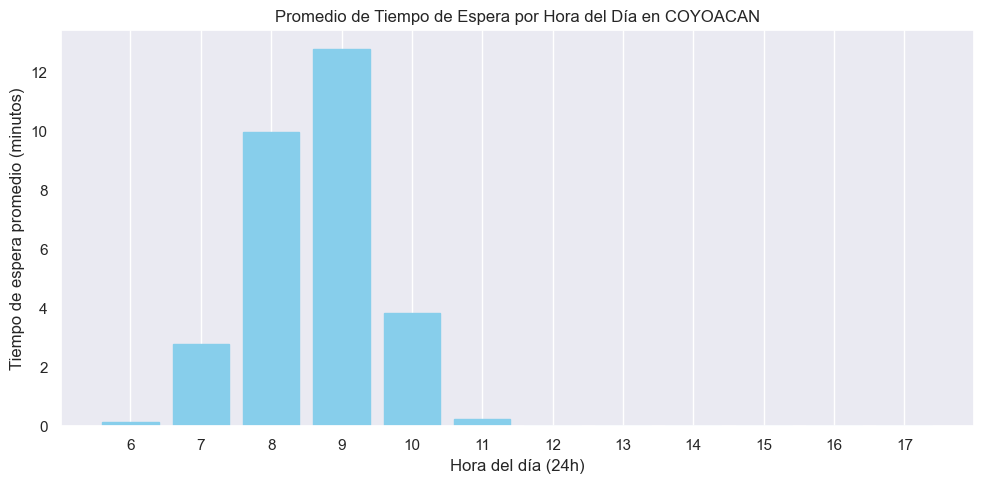

In [14]:
df_te["hora"] = df_te["hora_inicio"].dt.hour

# Agrupar por hora y calcular promedio
espera_por_hora = df_te.groupby("hora")["espera_min"].mean()

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(espera_por_hora.index, espera_por_hora.values, color='skyblue', edgecolor='skyblue')

plt.title("Promedio de Tiempo de Espera por Hora del Día en COYOACAN")
plt.xlabel("Hora del día (24h)")
plt.ylabel("Tiempo de espera promedio (minutos)")
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


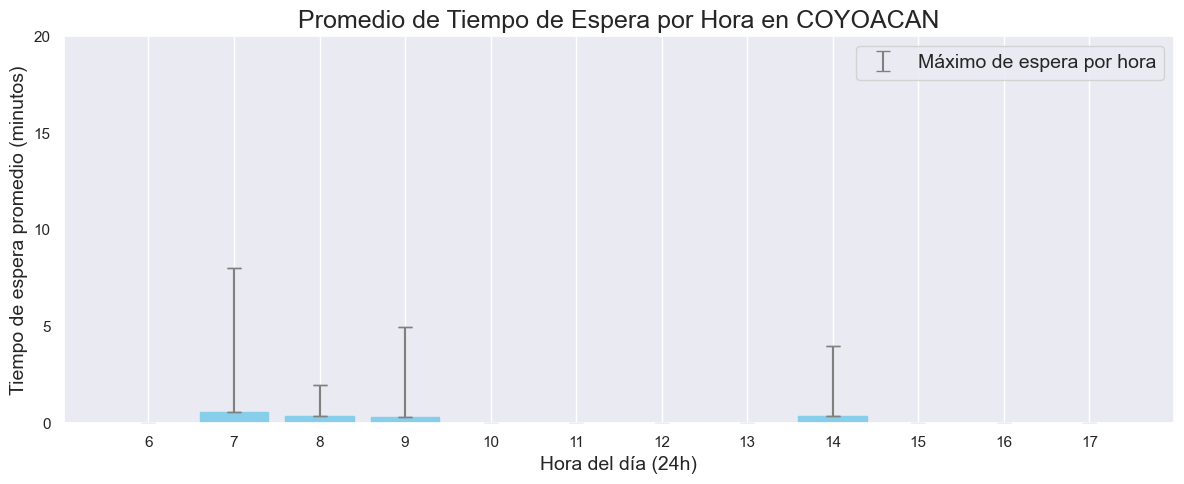

In [34]:
df_te["hora"] = df_te["hora_inicio"].dt.hour
agrupado = df_te.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en COYOACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))            
plt.yticks(range(0, 21, 5))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCOY.png', dpi=300)

In [16]:
df_te['espera_min'].mean()

4.059590316573557

In [17]:
df_te['espera_min'].max()

20.0

In [18]:
len(df_te[df_te['espera_min']>20])

0

In [19]:
df_te[df_te['espera_min']>20]

,id,prioridad,hora_llegada,hora_inicio,espera_min,caja,hora


## CULIACAN

In [20]:
df_sim = simulacion_pacientes("CULIACAN", df)
df_te = simular_atencion(df_sim, cajas=7) 

06:04:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:09:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:09:00 | Caja 3 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:10:00 | Caja 4 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:11:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:12:00 | Caja 5 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:13:00 | Caja 2 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:28:00 | Caja 2 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:30:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 3 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:35:00 | Caja 1 atiende ID 14 (Prioridad 0) - Espera: 0.0 min
06:38:00 | Caja 1 atiende ID 15 (Prioridad 0) - Es

09:34:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 3 atiende ID 186 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 4 atiende ID 187 (Prioridad 1) - Espera: 0.0 min
09:34:00 | Caja 5 atiende ID 188 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 3 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
09:36:00 | Caja 5 atiende ID 189 (Prioridad 0) - Espera: 0.0 min
09:37:00 | Caja 2 atiende ID 191 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 1 atiende ID 192 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 4 atiende ID 194 (Prioridad 1) - Espera: 0.0 min
09:38:00 | Caja 6 atiende ID 193 (Prioridad 0) - Espera: 0.0 min
09:38:00 | Caja 7 atiende ID 195 (Prioridad 0) - Espera: 0.0 min
09:39:00 | Caja 3 atiende ID 196 (Prioridad 1) - Espera: 0.0 min
09:40:00 | Caja 5 atiende ID 197 (Prioridad 0) - Espera: 1.0 min
09:40:00 | Caja 6 atiende ID 198 (Prioridad 0) - Espera: 0.0 min
09:41:00 | Caja 2 atiende ID 199 (Prioridad 1) - Espera: 0.0 min
09:42:00 | Caja 1 atiende

13:51:00 | Caja 1 atiende ID 364 (Prioridad 1) - Espera: 0.0 min
13:51:00 | Caja 2 atiende ID 363 (Prioridad 0) - Espera: 0.0 min
13:53:00 | Caja 2 atiende ID 365 (Prioridad 1) - Espera: 0.0 min
13:53:00 | Caja 3 atiende ID 366 (Prioridad 1) - Espera: 0.0 min
13:54:00 | Caja 4 atiende ID 367 (Prioridad 1) - Espera: 0.0 min
14:02:00 | Caja 1 atiende ID 368 (Prioridad 1) - Espera: 0.0 min
14:10:00 | Caja 1 atiende ID 369 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 2 atiende ID 370 (Prioridad 1) - Espera: 0.0 min
14:11:00 | Caja 3 atiende ID 371 (Prioridad 1) - Espera: 0.0 min
14:17:00 | Caja 1 atiende ID 372 (Prioridad 1) - Espera: 0.0 min
14:20:00 | Caja 1 atiende ID 373 (Prioridad 1) - Espera: 0.0 min
14:21:00 | Caja 2 atiende ID 374 (Prioridad 0) - Espera: 0.0 min
14:27:00 | Caja 1 atiende ID 375 (Prioridad 0) - Espera: 0.0 min
14:29:00 | Caja 3 atiende ID 377 (Prioridad 1) - Espera: 0.0 min
14:29:00 | Caja 4 atiende ID 376 (Prioridad 0) - Espera: 0.0 min
14:33:00 | Caja 1 atiende

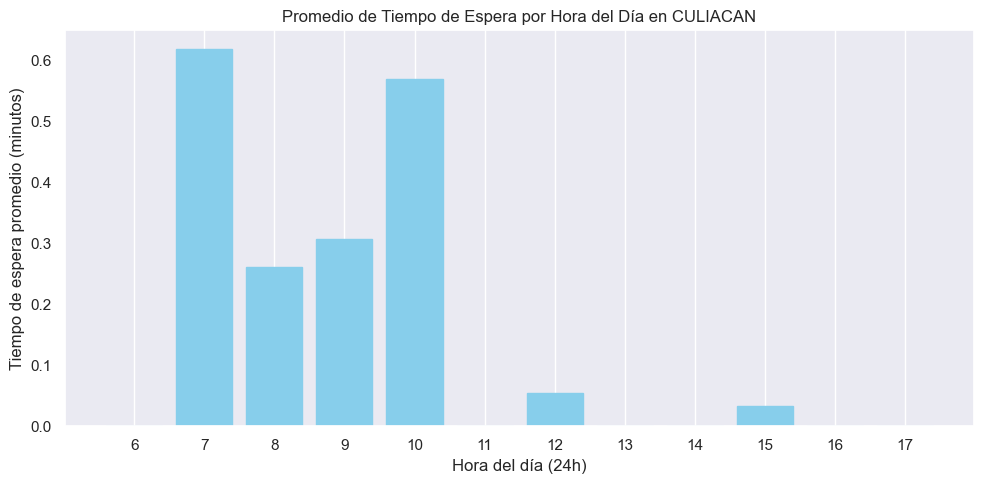

In [21]:
df_te["hora"] = df_te["hora_inicio"].dt.hour

# Agrupar por hora y calcular promedio
espera_por_hora = df_te.groupby("hora")["espera_min"].mean()

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(espera_por_hora.index, espera_por_hora.values, color='skyblue', edgecolor='skyblue')

plt.title("Promedio de Tiempo de Espera por Hora del Día en CULIACAN")
plt.xlabel("Hora del día (24h)")
plt.ylabel("Tiempo de espera promedio (minutos)")
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

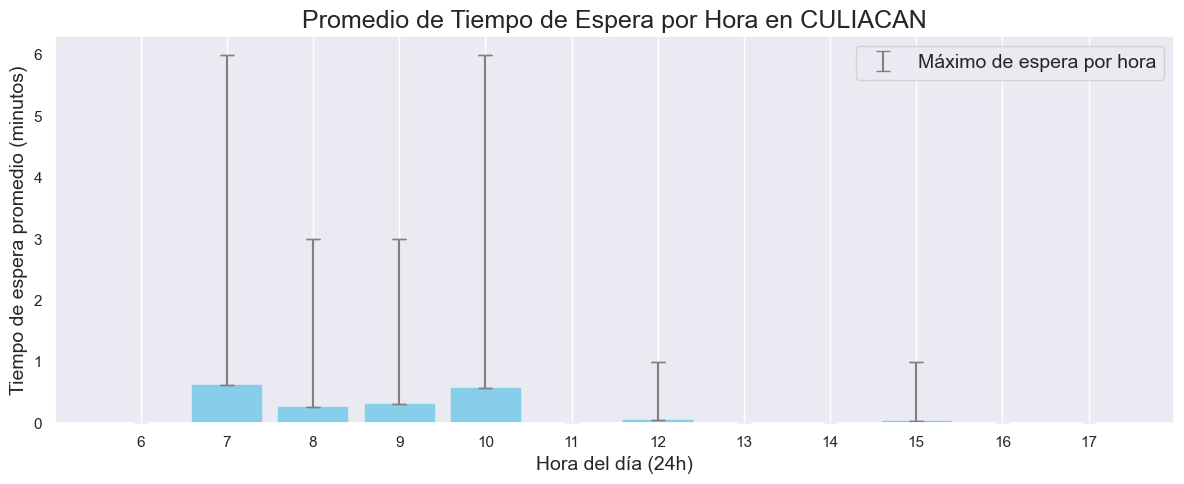

In [22]:
df_te["hora"] = df_te["hora_inicio"].dt.hour
agrupado = df_te.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCUL.png', dpi=300)

## CULIACAN CAÑADAS

In [23]:
df_sim = simulacion_pacientes("CULIACAN CAÑADAS", df)
df_te = simular_atencion(df_sim, cajas=3) 

06:01:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:04:00 | Caja 2 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 2 (Prioridad 0) - Espera: 0.0 min
06:11:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 2 atiende ID 4 (Prioridad 0) - Espera: 0.0 min
06:15:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:20:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:22:00 | Caja 2 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:23:00 | Caja 3 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 1.0 min
06:25:00 | Caja 2 atiende ID 12 (Prioridad 1) - Espera: 1.0 min
06:25:00 | Caja 3 atiende ID 14 (Prioridad 1) - Espera: 1.0 min
06:28:00 | Caja 1 atiende ID 13 (Prioridad 0) - Espera: 4.0 min
06:28:00 | Caja 2 atiende ID 15 (Prioridad 0) - Es

10:24:00 | Caja 1 atiende ID 174 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 1 atiende ID 175 (Prioridad 0) - Espera: 0.0 min
10:34:00 | Caja 2 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 1 atiende ID 177 (Prioridad 1) - Espera: 0.0 min
10:39:00 | Caja 2 atiende ID 178 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 3 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
10:42:00 | Caja 1 atiende ID 180 (Prioridad 1) - Espera: 2.0 min
10:44:00 | Caja 2 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
10:46:00 | Caja 2 atiende ID 182 (Prioridad 1) - Espera: 1.0 min
10:47:00 | Caja 3 atiende ID 183 (Prioridad 0) - Espera: 1.0 min
10:48:00 | Caja 1 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 3 atiende ID 185 (Prioridad 0) - Espera: 0.0 min
10:52:00 | Caja 2 atiende ID 186 (Prioridad 1) - Espera: 2.0 min
10:53:00 | Caja 1 atiende ID 188 (Prioridad 1) - Espera: 1.0 min
10:53:00 | Caja 3 atiende ID 187 (Prioridad 0) - Espera: 3.0 min
10:55:00 | Caja 2 atiende

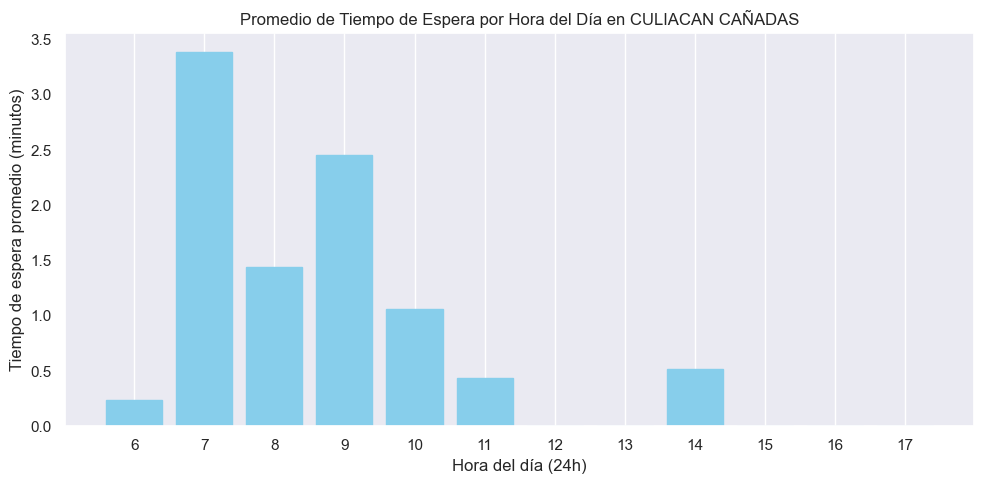

In [24]:
df_te["hora"] = df_te["hora_inicio"].dt.hour

# Agrupar por hora y calcular promedio
espera_por_hora = df_te.groupby("hora")["espera_min"].mean()

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(espera_por_hora.index, espera_por_hora.values, color='skyblue', edgecolor='skyblue')

plt.title("Promedio de Tiempo de Espera por Hora del Día en CULIACAN CAÑADAS")
plt.xlabel("Hora del día (24h)")
plt.ylabel("Tiempo de espera promedio (minutos)")
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

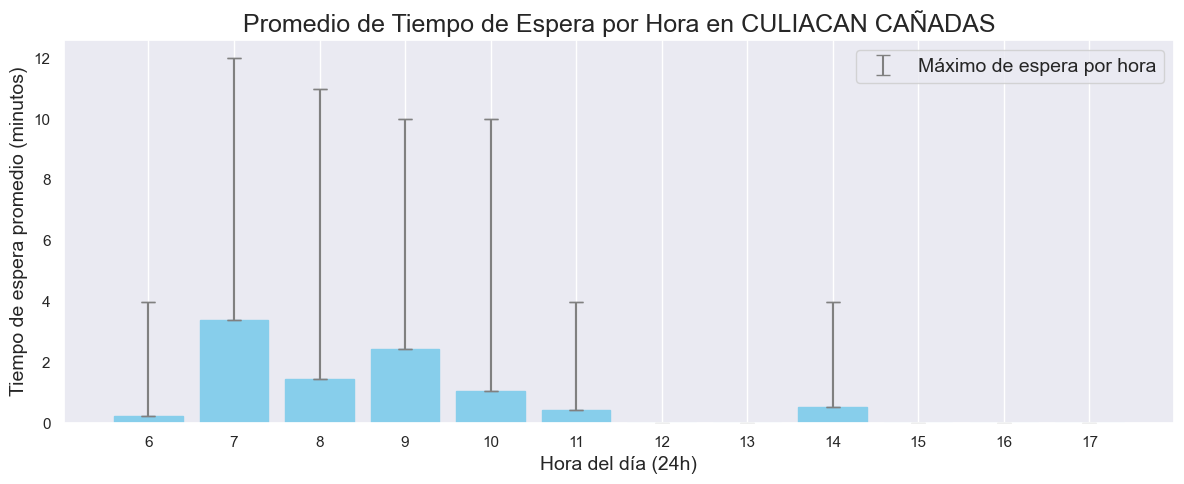

In [25]:
df_te["hora"] = df_te["hora_inicio"].dt.hour
agrupado = df_te.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN CAÑADAS", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCAN.png', dpi=300)

## CULIACAN COLEGIO MILITAR

In [26]:
df_sim = simulacion_pacientes("CULIACAN COLEGIO MILITAR", df)
df_te = simular_atencion(df_sim, cajas=4) 

06:00:00 | Caja 1 atiende ID 0 (Prioridad 0) - Espera: 0.0 min
06:07:00 | Caja 1 atiende ID 1 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:14:00 | Caja 2 atiende ID 3 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 2 atiende ID 5 (Prioridad 1) - Espera: 0.0 min
06:19:00 | Caja 3 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:23:00 | Caja 1 atiende ID 7 (Prioridad 0) - Espera: 0.0 min
06:24:00 | Caja 3 atiende ID 8 (Prioridad 0) - Espera: 0.0 min
06:26:00 | Caja 4 atiende ID 9 (Prioridad 1) - Espera: 0.0 min
06:27:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:31:00 | Caja 1 atiende ID 11 (Prioridad 0) - Espera: 0.0 min
06:36:00 | Caja 1 atiende ID 12 (Prioridad 1) - Espera: 0.0 min
06:40:00 | Caja 1 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
06:41:00 | Caja 2 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
06:43:00 | Caja 3 atiende ID 15 (Prioridad 1) - Es

10:31:00 | Caja 1 atiende ID 176 (Prioridad 1) - Espera: 0.0 min
10:31:00 | Caja 3 atiende ID 177 (Prioridad 0) - Espera: 0.0 min
10:32:00 | Caja 2 atiende ID 178 (Prioridad 1) - Espera: 0.0 min
10:34:00 | Caja 1 atiende ID 179 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 1 atiende ID 181 (Prioridad 1) - Espera: 0.0 min
10:37:00 | Caja 2 atiende ID 180 (Prioridad 0) - Espera: 0.0 min
10:40:00 | Caja 2 atiende ID 182 (Prioridad 1) - Espera: 0.0 min
10:44:00 | Caja 1 atiende ID 183 (Prioridad 0) - Espera: 0.0 min
10:45:00 | Caja 2 atiende ID 184 (Prioridad 1) - Espera: 0.0 min
10:47:00 | Caja 1 atiende ID 185 (Prioridad 1) - Espera: 0.0 min
10:49:00 | Caja 3 atiende ID 186 (Prioridad 0) - Espera: 0.0 min
10:49:00 | Caja 4 atiende ID 187 (Prioridad 0) - Espera: 0.0 min
10:51:00 | Caja 1 atiende ID 188 (Prioridad 0) - Espera: 0.0 min
10:53:00 | Caja 2 atiende ID 189 (Prioridad 1) - Espera: 1.0 min
10:53:00 | Caja 4 atiende ID 190 (Prioridad 1) - Espera: 0.0 min
10:55:00 | Caja 1 atiende

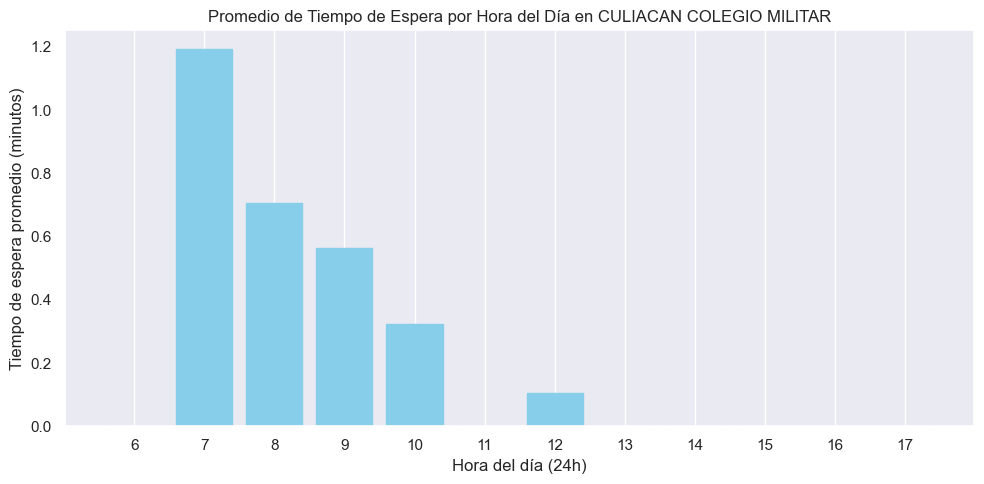

In [27]:
df_te["hora"] = df_te["hora_inicio"].dt.hour

# Agrupar por hora y calcular promedio
espera_por_hora = df_te.groupby("hora")["espera_min"].mean()

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(espera_por_hora.index, espera_por_hora.values, color='skyblue', edgecolor='skyblue')

plt.title("Promedio de Tiempo de Espera por Hora del Día en CULIACAN COLEGIO MILITAR")
plt.xlabel("Hora del día (24h)")
plt.ylabel("Tiempo de espera promedio (minutos)")
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.tight_layout()


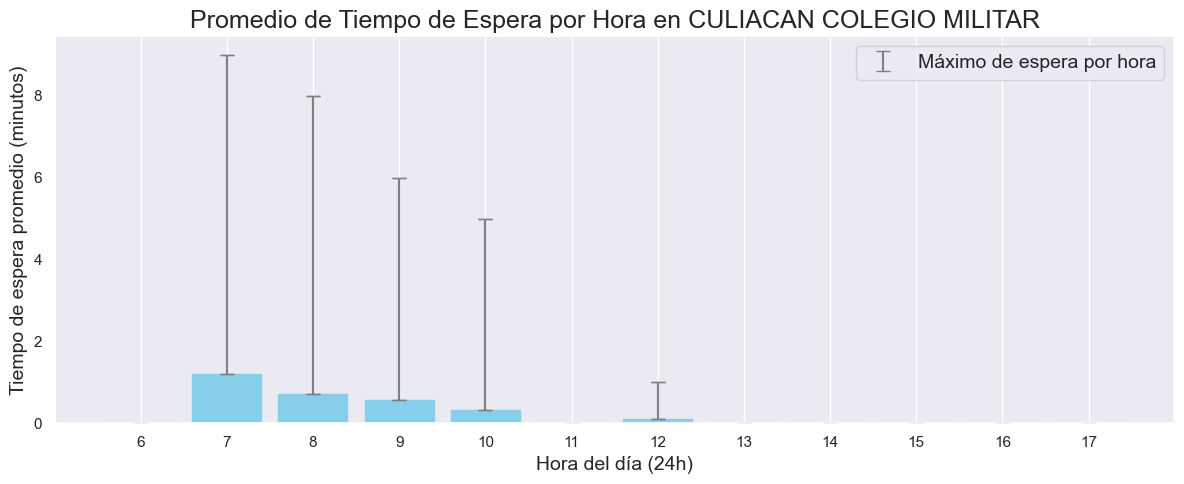

In [28]:
df_te["hora"] = df_te["hora_inicio"].dt.hour
agrupado = df_te.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN COLEGIO MILITAR", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCOLMIL.png', dpi=300)

## CULIACAN LA CONQUISTA

In [29]:
df_sim = simulacion_pacientes("CULIACAN COLEGIO MILITAR", df)
df_te = simular_atencion(df_sim, cajas=4) 

06:04:00 | Caja 1 atiende ID 0 (Prioridad 1) - Espera: 0.0 min
06:05:00 | Caja 1 atiende ID 1 (Prioridad 0) - Espera: 0.0 min
06:08:00 | Caja 1 atiende ID 2 (Prioridad 1) - Espera: 0.0 min
06:13:00 | Caja 2 atiende ID 3 (Prioridad 0) - Espera: 0.0 min
06:16:00 | Caja 1 atiende ID 4 (Prioridad 1) - Espera: 0.0 min
06:17:00 | Caja 2 atiende ID 5 (Prioridad 0) - Espera: 0.0 min
06:18:00 | Caja 1 atiende ID 6 (Prioridad 1) - Espera: 0.0 min
06:24:00 | Caja 1 atiende ID 7 (Prioridad 1) - Espera: 0.0 min
06:30:00 | Caja 1 atiende ID 8 (Prioridad 1) - Espera: 0.0 min
06:35:00 | Caja 1 atiende ID 9 (Prioridad 0) - Espera: 0.0 min
06:39:00 | Caja 1 atiende ID 10 (Prioridad 1) - Espera: 0.0 min
06:51:00 | Caja 1 atiende ID 11 (Prioridad 1) - Espera: 0.0 min
06:56:00 | Caja 1 atiende ID 12 (Prioridad 0) - Espera: 0.0 min
06:59:00 | Caja 2 atiende ID 13 (Prioridad 1) - Espera: 0.0 min
07:00:00 | Caja 3 atiende ID 14 (Prioridad 1) - Espera: 0.0 min
07:01:00 | Caja 2 atiende ID 16 (Prioridad 1) - Es

10:47:00 | Caja 1 atiende ID 159 (Prioridad 1) - Espera: 0.0 min
10:53:00 | Caja 1 atiende ID 160 (Prioridad 0) - Espera: 0.0 min
11:11:00 | Caja 1 atiende ID 161 (Prioridad 1) - Espera: 0.0 min
11:11:00 | Caja 2 atiende ID 162 (Prioridad 1) - Espera: 0.0 min
11:15:00 | Caja 1 atiende ID 163 (Prioridad 1) - Espera: 0.0 min
11:17:00 | Caja 2 atiende ID 164 (Prioridad 1) - Espera: 0.0 min
11:19:00 | Caja 3 atiende ID 165 (Prioridad 1) - Espera: 0.0 min
11:27:00 | Caja 1 atiende ID 166 (Prioridad 1) - Espera: 0.0 min
11:29:00 | Caja 2 atiende ID 167 (Prioridad 0) - Espera: 0.0 min
11:31:00 | Caja 1 atiende ID 168 (Prioridad 0) - Espera: 0.0 min
11:33:00 | Caja 2 atiende ID 169 (Prioridad 0) - Espera: 0.0 min
11:34:00 | Caja 1 atiende ID 171 (Prioridad 1) - Espera: 0.0 min
11:34:00 | Caja 3 atiende ID 170 (Prioridad 0) - Espera: 0.0 min
11:43:00 | Caja 1 atiende ID 172 (Prioridad 1) - Espera: 0.0 min
11:44:00 | Caja 2 atiende ID 173 (Prioridad 0) - Espera: 0.0 min
11:47:00 | Caja 3 atiende

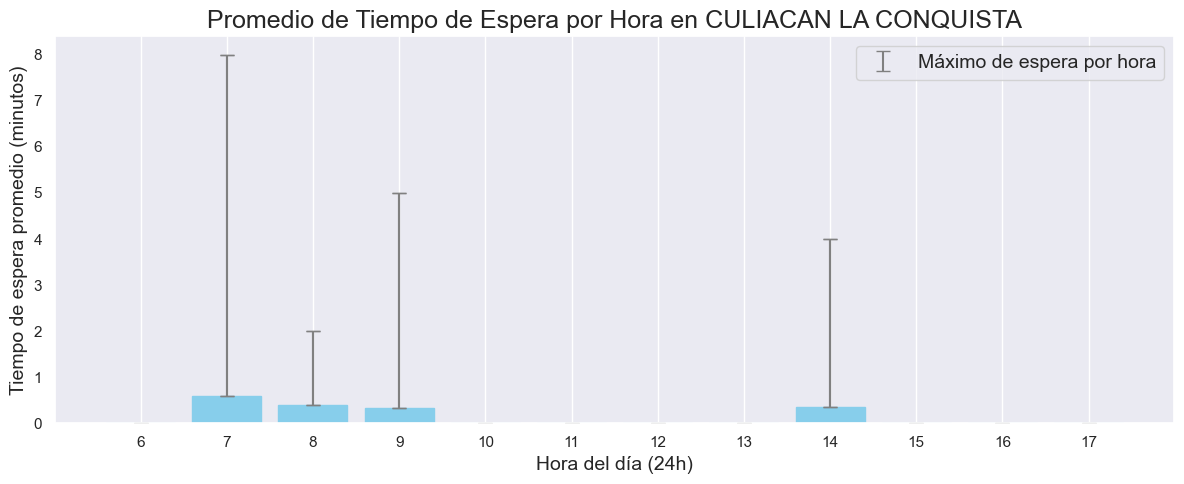

In [30]:
df_te["hora"] = df_te["hora_inicio"].dt.hour
agrupado = df_te.groupby("hora")["espera_min"].agg(["mean", "max"])

# Calculamos barras de error
yerr_abajo = [0] * len(agrupado)
yerr_arriba = agrupado["max"] - agrupado["mean"]

# Graficamos
plt.figure(figsize=(12, 5))
plt.bar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    capsize=5,
    color='skyblue',
    edgecolor='skyblue',
    ecolor='gray',
    error_kw=dict(lw=1.5),
)
plt.errorbar(
    agrupado.index,
    agrupado["mean"],
    yerr=[yerr_abajo, yerr_arriba],
    fmt='none',
    ecolor='gray',
    capsize=5,
    label="Máximo de espera por hora"
)

plt.title("Promedio de Tiempo de Espera por Hora en CULIACAN LA CONQUISTA", fontsize = 18)
plt.xlabel("Hora del día (24h)", fontsize = 14)
plt.ylabel("Tiempo de espera promedio (minutos)", fontsize = 14)
plt.xticks(range(df_te["hora"].min(), df_te["hora"].max() + 1))
plt.grid(axis='y')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('resCULCONQ.png', dpi=300)